# Clasificador de señales

In [67]:
# coding: latin-1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
baseline = pd.read_csv('data/dataset_2024/baseline.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])

Hacemos un Head para ver el dataset baseline

In [69]:
print('Estructura de la informacion:')
print(baseline)

Estructura de la informacion:
          timestamp  counter  eeg  attention  meditation  blinking
0      1.732232e+09       88   96          0           0         0
1      1.732232e+09       89   74          0           0         0
2      1.732232e+09       90   42          0           0         0
3      1.732232e+09       91   36          0           0         0
4      1.732232e+09       92   38          0           0         0
...             ...      ...  ...        ...         ...       ...
30845  1.732232e+09       73   23        100          56         0
30846  1.732232e+09       74   22        100          56         0
30847  1.732232e+09       75   11        100          56         0
30848  1.732232e+09       76    3        100          56         0
30849  1.732232e+09       77   12        100          56         0

[30850 rows x 6 columns]


Analizamos la cantidad de columnas y registros

In [70]:
baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30850 entries, 0 to 30849
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   30850 non-null  float64
 1   counter     30850 non-null  int64  
 2   eeg         30850 non-null  int64  
 3   attention   30850 non-null  int64  
 4   meditation  30850 non-null  int64  
 5   blinking    30850 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.4 MB


No se observan Nulls

In [71]:
baseline.describe()

,timestamp,counter,eeg,attention,meditation,blinking
count,3.085000e+04,30850.000000,30850.00000,30850.000000,30850.000000,30850.0
mean,1.732232e+09,49.489303,30.69128,60.661264,56.939773,0.0
std,1.732259e+01,28.861460,48.72812,24.832033,19.328587,0.0
min,1.732232e+09,0.000000,-488.00000,0.000000,0.000000,0.0
25%,1.732232e+09,25.000000,7.00000,44.000000,47.000000,0.0
50%,1.732232e+09,49.000000,32.00000,63.000000,57.000000,0.0
75%,1.732232e+09,74.000000,54.00000,81.000000,66.000000,0.0
max,1.732232e+09,99.000000,793.00000,100.000000,90.000000,0.0


In [72]:
data_bl = baseline.values
eeg_bl = data_bl[:,2]

print(eeg_bl)

[96. 74. 42. ... 11.  3. 12.]


Analizamos el campo counter, que indica la numeración de tramas (el sensor envia señales en tramas y las enumera del 0 al 99 y vuelve a iniciar)

In [73]:
counter_bl = data_bl[:,1]
print(counter_bl)

[88. 89. 90. ... 75. 76. 77.]


Determinamos si la secuencia de la enumeración es la correcta:

In [74]:
def es_secuencial(arr): 
    # Verificar si la longitud del array es menor que 2 
    if len(arr) < 2: 
        return True # Un array con 0 o 1 elementos es secuencial por definición 
    # Verificar si cada elemento es uno más que el anterior 
    for i in range(1, len(arr)):
        if arr[i] != arr[i - 1] + 1:
            return False # Si se encuentra un elemento que no sigue la secuencia, retorna False
    
    return True # Si pasa todas las verificaciones, retorna True

In [75]:
print(es_secuencial(counter_bl))

False


Esto indica que se perdieron datos.

In [76]:
counter_eeg_bl = np.array([counter_bl,eeg_bl])
print(counter_eeg_bl)

[[88. 89. 90. ... 75. 76. 77.]
 [96. 74. 42. ... 11.  3. 12.]]


Se observa que la secuencia de numeracion de las tramsa NO es correcta, es decir, que falta o se perdío algun dato.

La frecuencia de sampleo del baseline es de 512 Hz

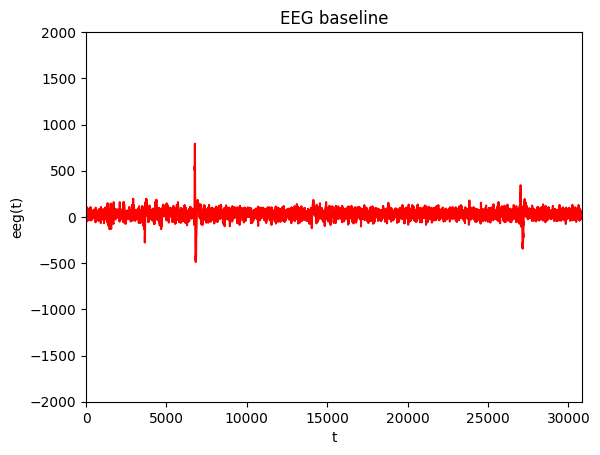

In [77]:
plt.plot(eeg_bl,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG baseline')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg_bl)])
plt.show()

### Analizamos el dataset deathmetal

In [78]:
deathmetal = pd.read_csv('data/dataset_2024/deathmetal.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])

In [79]:
print('Estructura de la informacion:')
print(deathmetal)

Estructura de la informacion:
          timestamp  counter  eeg  attention  meditation  blinking
0      1.732233e+09       39  -39          0           0         0
1      1.732233e+09       40  -36          0           0         0
2      1.732233e+09       41  -39          0           0         0
3      1.732233e+09       42  -46          0           0         0
4      1.732233e+09       43  -41          0           0         0
...             ...      ...  ...        ...         ...       ...
29864  1.732233e+09       35   16          4          63         0
29865  1.732233e+09       36   29          4          63         0
29866  1.732233e+09       37   42          4          63         0
29867  1.732233e+09       38   51          4          63         0
29868  1.732233e+09       39   41          4          63         0

[29869 rows x 6 columns]


In [80]:
deathmetal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29869 entries, 0 to 29868
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   29869 non-null  float64
 1   counter     29869 non-null  int64  
 2   eeg         29869 non-null  int64  
 3   attention   29869 non-null  int64  
 4   meditation  29869 non-null  int64  
 5   blinking    29869 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.4 MB


In [110]:
deathmetal.describe()

,timestamp,counter,eeg,attention,meditation,blinking,label
count,2.986900e+04,29869.000000,29869.000000,29869.000000,29869.000000,29869.0,29869.0
mean,1.732233e+09,49.497506,29.764639,34.872811,55.215374,0.0,1.0
std,1.735425e+01,28.869548,55.645994,17.387864,27.649473,0.0,0.0
min,1.732233e+09,0.000000,-406.000000,0.000000,0.000000,0.0,1.0
25%,1.732233e+09,24.000000,9.000000,21.000000,35.000000,0.0,1.0
50%,1.732233e+09,49.000000,32.000000,37.000000,56.000000,0.0,1.0
75%,1.732233e+09,74.000000,52.000000,51.000000,75.000000,0.0,1.0
max,1.732233e+09,99.000000,620.000000,63.000000,100.000000,0.0,1.0


In [82]:
dm = deathmetal.values
eeg_dm = dm[:,2]

print(eeg_dm)

[-39. -36. -39. ...  42.  51.  41.]


In [83]:
counter_dm = dm[:,1]
print(counter_dm)

[39. 40. 41. ... 37. 38. 39.]


In [84]:
print(es_secuencial(counter_dm))

False


Por lo tanto se observa que la frecuencia de sampleo del dataset deathmetal es de 300 Hz

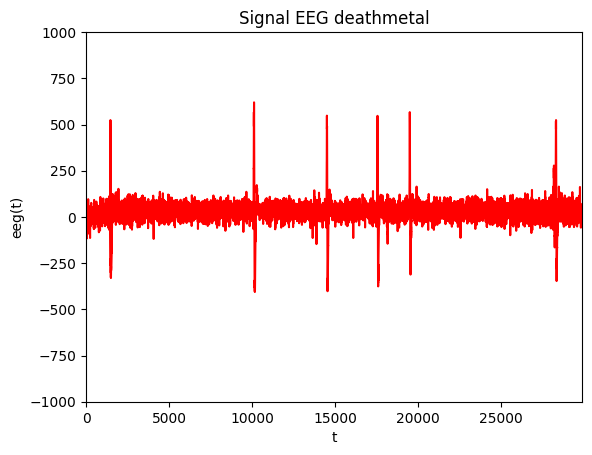

In [85]:
plt.plot(eeg_dm,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'Signal EEG deathmetal')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-1000, 1000]);
plt.xlim([0,len(eeg_dm)])
plt.show()


### Analizamos el dataset bethoven

In [86]:
bethoven = pd.read_csv('data/dataset_2024/bethoven.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])

In [87]:
print('Estructura de la informacion:')
print(bethoven)

Estructura de la informacion:
          timestamp  counter  eeg  attention  meditation  blinking
0      1.732233e+09       49  -10          0           0         0
1      1.732233e+09       50   -2          0           0         0
2      1.732233e+09       51   -4          0           0         0
3      1.732233e+09       52  -12          0           0         0
4      1.732233e+09       53  -13          0           0         0
...             ...      ...  ...        ...         ...       ...
30845  1.732233e+09       34   38         48          48         0
30846  1.732233e+09       35   33         48          48         0
30847  1.732233e+09       36   43         48          48         0
30848  1.732233e+09       37   65         48          48         0
30849  1.732233e+09       38   70         48          48         0

[30850 rows x 6 columns]


In [88]:
bethoven.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30850 entries, 0 to 30849
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   30850 non-null  float64
 1   counter     30850 non-null  int64  
 2   eeg         30850 non-null  int64  
 3   attention   30850 non-null  int64  
 4   meditation  30850 non-null  int64  
 5   blinking    30850 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.4 MB


In [89]:
bethoven.describe()

,timestamp,counter,eeg,attention,meditation,blinking
count,3.085000e+04,30850.000000,30850.000000,30850.000000,30850.000000,30850.0
mean,1.732233e+09,49.491572,29.794457,60.988266,50.831248,0.0
std,1.732204e+01,28.873122,42.153701,21.286069,19.291509,0.0
min,1.732233e+09,0.000000,-446.000000,0.000000,0.000000,0.0
25%,1.732233e+09,24.000000,9.000000,50.000000,43.000000,0.0
50%,1.732233e+09,50.000000,32.000000,61.000000,53.000000,0.0
75%,1.732233e+09,74.000000,51.000000,77.000000,60.000000,0.0
max,1.732233e+09,99.000000,605.000000,100.000000,88.000000,0.0


In [90]:
bt = bethoven.values
eeg_bt = bt[:,2]

print(eeg_bt)

[-10.  -2.  -4. ...  43.  65.  70.]


In [91]:
counter_bt = bt[:,1]
print(counter_bt)

[49. 50. 51. ... 36. 37. 38.]


In [92]:
print(es_secuencial(counter_bt))

False


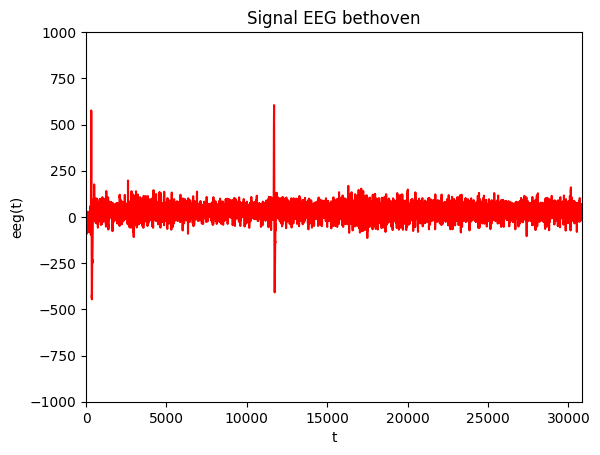

In [93]:
plt.plot(eeg_bt,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'Signal EEG bethoven')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-1000, 1000]);
plt.xlim([0,len(eeg_bt)])
plt.show()

## Preprocesamiento y clasificación

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scipy.signal import welch
from scipy.stats import entropy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
# Crear etiquetas para las dos clases
bethoven['label'] = 0  # Beethoven
deathmetal['label'] = 1  # Death Metal

In [96]:
# Concatenar los datos
data = pd.concat([bethoven, deathmetal], ignore_index=True)

# Completar valores faltantes en la columna eeg usando interpolación
data['eeg'] = data['eeg'].interpolate()


In [97]:
# Extraer características de la señal EEG
def extract_features(signal, sampling_rate=512):
    """
    Extraer características de señal EEG, como media, desviación estándar, skewness, kurtosis
    energía y frecuencia dominante utilizando la transformada de Welch.
    """
    features = {}
    features['mean'] = np.mean(signal)
    features['std'] = np.std(signal)
    features['skewness'] = np.mean((signal - np.mean(signal))**3) / np.std(signal)**3
    features['kurtosis'] = np.mean((signal - np.mean(signal))**4) / np.std(signal)**4
    features['energy'] = np.sum(signal ** 2) / len(signal)
    
    # Transformada de Welch para obtener la frecuencia dominante (PSD)
    freqs, psd = welch(signal, fs=sampling_rate)
    features['freq_dominant'] = freqs[np.argmax(psd)]
    
    # Entropía espectral
    features['spectral_entropy'] = entropy(psd / np.sum(psd))
    
    # Energía por bandas de frecuencia
    features['delta_power'] = np.sum(psd[(freqs >= 0.5) & (freqs < 4)])
    features['theta_power'] = np.sum(psd[(freqs >= 4) & (freqs < 8)])
    features['alpha_power'] = np.sum(psd[(freqs >= 8) & (freqs < 12)])
    features['beta_power'] = np.sum(psd[(freqs >= 12) & (freqs < 30)])
    features['gamma_power'] = np.sum(psd[(freqs >= 30)])
    
    return features

In [98]:
# Aplicar la extracción de características por ventanas deslizantes
#window_size = 512  # Tamaño de la ventana en muestras (1 segundo si fs=512 Hz)
window_size = 265  # Tamaño de la ventana en muestras (0.5 segundo si fs=512 Hz)
#step_size = 256  # Superposición del 50%
step_size = 5  # Superposición del 1%
sampling_rate = 512  # Frecuencia de muestreo

rows = []
for label, group in data.groupby('label'):
    eeg_signal = group['eeg'].to_numpy()
    for start in range(0, len(eeg_signal) - window_size, step_size):
        window = eeg_signal[start:start + window_size]
        features = extract_features(window, sampling_rate)
        features['label'] = label
        rows.append(features)

In [99]:
# Crear un DataFrame con las características extraídas
features_df = pd.DataFrame(rows)

# Separar en conjunto de entrenamiento y prueba
X = features_df.drop(columns=['label'])
y = features_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
# Clasificación con RandomForest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3059
           1       0.96      0.97      0.97      2960

    accuracy                           0.97      6019
   macro avg       0.97      0.97      0.97      6019
weighted avg       0.97      0.97      0.97      6019



In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [1, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Búsqueda en GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor accuracy en validación cruzada:", grid_search.best_score_)

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Mejor accuracy en validación cruzada: 0.9543112042706081


In [60]:
# Clasificación con SVM
svm_clf = SVC(kernel='poly', C=10, gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)

# Evaluar el modelo SVM
y_pred_svm = svm_clf.predict(X_test)
print("\nResultados con SVM:")
print(classification_report(y_test, y_pred_svm))



Resultados con SVM:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      3059
           1       0.67      0.63      0.65      2960

    accuracy                           0.66      6019
   macro avg       0.66      0.66      0.66      6019
weighted avg       0.66      0.66      0.66      6019



In [ ]:
from sklearn.svm import SVC

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01],
    'kernel': ['rbf']
}

# Búsqueda en GridSearchCV
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor accuracy en validación cruzada:", grid_search.best_score_)

# Evaluar el modelo en el conjunto de prueba
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)


Mejores hiperparámetros: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Mejor accuracy en validación cruzada: 0.6436299892572004


In [63]:
# Clasificación con Regresión Logística

logreg_clf = LogisticRegression(random_state=42, max_iter=1000,)
logreg_clf.fit(X_train, y_train)

# Evaluar el modelo de Regresión Logística
y_pred_logreg = logreg_clf.predict(X_test)
print("\nResultados con Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))


Resultados con Regresión Logística:
              precision    recall  f1-score   support

           0       0.54      0.64      0.58      3059
           1       0.54      0.43      0.48      2960

    accuracy                           0.54      6019
   macro avg       0.54      0.54      0.53      6019
weighted avg       0.54      0.54      0.53      6019



In [64]:
# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],  # 'saga' soporta l1, l2 y elasticnet
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 500],
}

# Configurar la búsqueda en GridSearchCV
grid_search = GridSearchCV(estimator=logreg_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor accuracy en validación cruzada:", grid_search.best_score_)

# Evaluar el modelo en el conjunto de prueba
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Mejores hiperparámetros: {'C': 0.01, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Mejor accuracy en validación cruzada: 0.5467713606349575

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.54      0.76      0.63      3059
           1       0.56      0.32      0.41      2960

    accuracy                           0.54      6019
   macro avg       0.55      0.54      0.52      6019
weighted avg       0.55      0.54      0.52      6019



c:\Users\arnic\Desktop\Ariel\MCD\09 - Datos espaciales y cientificos\Datos cientificos\python-scientific\ps\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\arnic\Desktop\Ariel\MCD\09 - Datos espaciales y cientificos\Datos cientificos\python-scientific\ps\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\arnic\Desktop\Ariel\MCD\09 - Datos espaciales y cientificos\Datos cientif